### `Objective`: Generating a barplot that represent the mean tip for each day by sex category

#### Code `Outline`

* Loading `libraries` and `dataset`
* Plot using DataFrame [`Pandas DataFrame Style`]
* Plot using DataFrame [`Seaborn Style`]

#### Loading libraries

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Reading tips dataset

In [14]:
tips = pd.read_csv("datasets/tips.csv")
tips.head(2)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3


#### Aggregating tips by day and sex

In [15]:
df = (tips
      .groupby(["day", "sex"])["tip"]
      .agg("mean")
      .unstack()
      .round(2))
df

sex,Female,Male
day,,
Fri,2.78,2.69
Sat,2.80,3.08
Sun,3.37,3.22
Thur,2.58,2.98


### Plotting using DataFrame [Pandas DataFrame style]

<AxesSubplot:xlabel='day'>

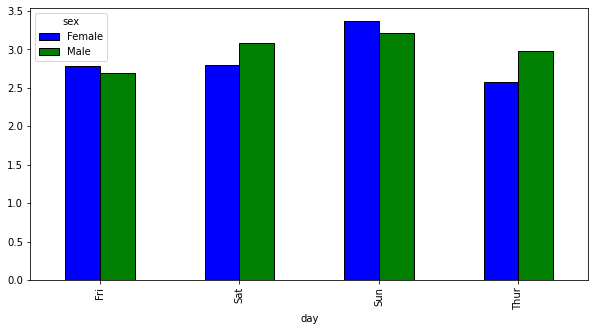

In [16]:
fig, ax = plt.subplots(figsize = (10, 5))

df.plot(kind = "bar",
        ax = ax,
        color = ['blue', 'green'],
        edgecolor = "black")

In [17]:
# Printing axes patch objects
ax.patches

<Axes.ArtistList of 8 patches>

In [18]:
# Printing patch items
for i in range(len(ax.patches)):
    print(ax.patches[i])

Rectangle(xy=(-0.25, 0), width=0.25, height=2.78, angle=0)
Rectangle(xy=(0.75, 0), width=0.25, height=2.8, angle=0)
Rectangle(xy=(1.75, 0), width=0.25, height=3.37, angle=0)
Rectangle(xy=(2.75, 0), width=0.25, height=2.58, angle=0)
Rectangle(xy=(0, 0), width=0.25, height=2.69, angle=0)
Rectangle(xy=(1, 0), width=0.25, height=3.08, angle=0)
Rectangle(xy=(2, 0), width=0.25, height=3.22, angle=0)
Rectangle(xy=(3, 0), width=0.25, height=2.98, angle=0)


#### Plot Customisation

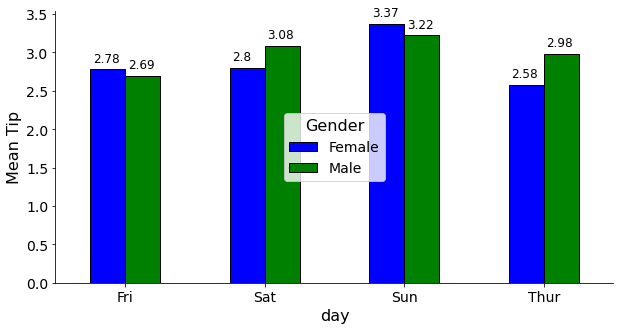

In [19]:
# Annotate data labels
for p in ax.patches:
    t = ax.annotate(str(p.get_height()), (p.get_x() + 0.02, p.get_height() + 0.1))
    t.set(color = "black", size = 12)

# Remove spines
spines_off = ["top", "right"]
for s in spines_off:
      ax.spines[s].set_visible(False)

# Adding labels
ax.set_ylabel("Mean Tip")
ax.tick_params(labelsize = 14, labelrotation = 0)
ax.xaxis.label.set(size=16)
ax.yaxis.label.set(size=16)

# Customising legend
ax.legend(loc = "center",
          fontsize = 14,
          title = 'Gender', 
          title_fontsize = 16)

fig

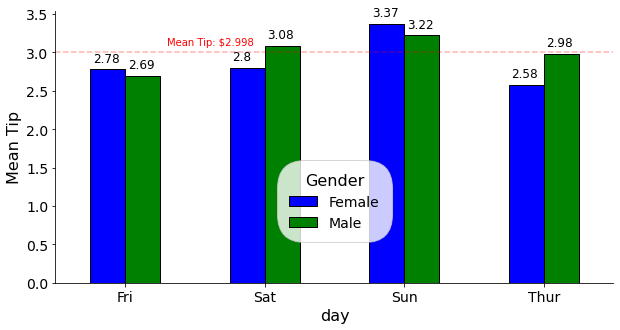

In [20]:
# Adding a horizontal line
ax.axhline(y = tips.tip.mean(), color = "red", linestyle = "dashed", alpha = 0.3)

# Adding text in plot
from matplotlib.text import Text
text = Text(x = 0.3, y = tips.tip.mean() + 0.1, text = f"Mean Tip: ${round(tips.tip.mean(), 3)}", color="red")
ax._add_text(text)

# Fixing legend box shape and position
ax.legend_.legendPatch.set_boxstyle("round, pad = 0.5, rounding_size = 2")
ax.legend_.legendPatch.set_facecolor("white")
ax.legend_.set_bbox_to_anchor([0.5, 0.3])
fig


In [21]:
fig.savefig("images/meanbarplot.png", dpi = 300)

### Plot using DataFrame [seaborn style]

In [22]:
tips.head(10)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


<AxesSubplot:xlabel='day', ylabel='tip'>

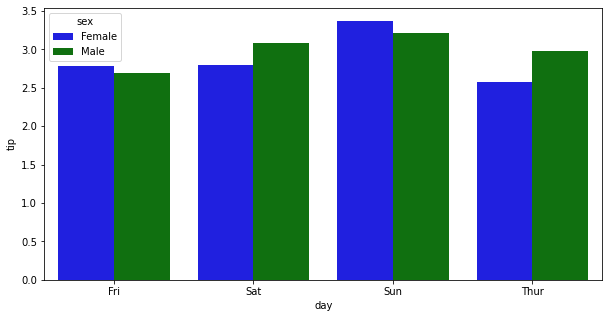

In [23]:
fig, ax = plt.subplots(figsize = (10, 5))

sns.barplot(x = "day",
            y = "tip",
            hue = "sex",
            data = tips,
            ax = ax,
            estimator = np.mean,
            ci = False,
            order = ["Fri", "Sat", "Sun", "Thur"],
            palette = ["blue", "green"])

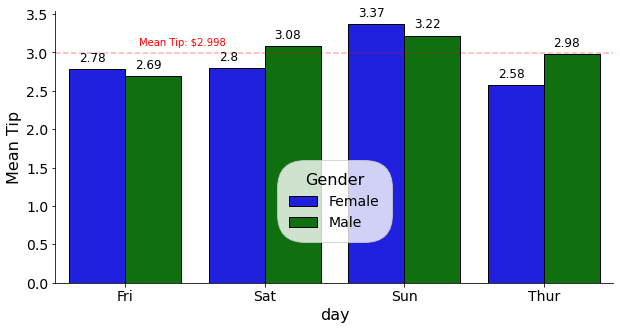

In [24]:
# Annotating data labels
for p in ax.patches:
    p.set_edgecolor("black") # additional
    t = ax.annotate(str(p.get_height().round(2)), (p.get_x() + 0.07, p.get_height() + 0.1))
    t.set(color = "black", size = 12)

##################################################################### Same from here
# Removing spines
spines_off = ["top", "right"]
for s in spines_off:
      ax.spines[s].set_visible(False)

# Adding labels
ax.set_ylabel("Mean Tip")
ax.tick_params(labelsize = 14, labelrotation = 0)
ax.xaxis.label.set(size=16)
ax.yaxis.label.set(size=16)

# Customising legend
ax.legend(loc = "center",
          fontsize = 14,
          title = 'Gender', 
          title_fontsize = 16)

# Adding a horizontal line
ax.axhline(y = tips.tip.mean(), color = "red", linestyle = "dashed", alpha = 0.3)

# Adding text in plot
from matplotlib.text import Text
text = Text(x = 0.1, y = tips.tip.mean() + 0.1, text = f"Mean Tip: ${round(tips.tip.mean(),3)}", color="red")
ax._add_text(text)

# Fixing legend box shape and position
ax.legend_.legendPatch.set_boxstyle("round, pad = 0.5, rounding_size = 2")
ax.legend_.legendPatch.set_facecolor("white")
ax.legend_.set_bbox_to_anchor([0.5, 0.3])

fig